In [1]:
import numpy as np
import pandas as pd
import os
import sys
import shutil

In [2]:
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from Utils import utils

In [3]:
parent_dir

'/home/andres/VSCode/UCAN-PET-CT-image-data-handling-pipeline'

In [3]:
config = utils.read_config()
config

{'common': {'paths': {'source_path_wd': 'E:/U-CAN-Lymfom_A',
   'source_path_bd': 'F:/ucan_lymfom'}},
 'selection': {'filenames': {'rejected_folder_filename': 'Rejected_exams_from_U-CAN-Lymfom.xlsx',
   'sourcefiltered_folder_filename': 'SourceFiltered_exams_from_U-CAN-Lymfom.xlsx',
   'incomplete_folders_filename_initial': 'No_PTorCT_exams_from_U-CAN-Lymfom1.xlsx',
   'incomplete_folders_filename_final': 'No_PTorCT_exams_from_U-CAN-Lymfom2.xlsx',
   'selected_folders_beforefiltering_filename': 'Selected_exams_beforefiltering_from_U-CAN-Lymfom.xlsx',
   'selected_folders_afterfiltering_filename': 'Selected_exams_afterfiltering_from_U-CAN-Lymfom.xlsx',
   'final_selected_images_filename': 'FinalSelected_exams_from_U-CAN-Lymfom.xlsx',
   'list_of_distorted_images_filename': 'Distorted_exams_from_U-CAN-Lymfom.xlsx'}},
 'metadata': {'filenames': {'final_selected_images_filename': 'Finalized_dataset.xlsx'}},
 'resampling': {'voxel_spacing': [2, 2, 3], 'image_size': [256, 256, 256]},
 'proje

In [4]:
#source_path_wd = "/media/andres/T7 Shield1/U-CAN-Lymfom_A/Selected_for_UCAN_project"
#source_path_bd = "/media/andres/T7 Shield/ucan_lymfom"

source_path_wd = config['common']['paths']['source_path_wd']
source_path_bd = config['common']['paths']['source_path_bd']

master_data_wd_filename = config['metadata']['filenames']['final_selected_images_filename']
master_data_bd_filename = config['metadata']['filenames']['final_selected_images_filename']


In [5]:
rejected_folder_filename = config['selection']['filenames']['rejected_folder_filename']
sourcefiltered_folder_filename = config['selection']['filenames']['sourcefiltered_folder_filename']
incomplete_folders_filename_initial = config['selection']['filenames']['incomplete_folders_filename_initial']
incomplete_folders_filename_final = config['selection']['filenames']['incomplete_folders_filename_final']
selected_folders_beforefiltering_filename = config['selection']['filenames']['selected_folders_beforefiltering_filename']
selected_folders_afterfiltering_filename = config['selection']['filenames']['selected_folders_afterfiltering_filename']
final_selected_images_filename = config['selection']['filenames']['final_selected_images_filename']
list_of_distorted_images_filename = config['selection']['filenames']['list_of_distorted_images_filename']

In [6]:
# Path for files on white disk - 1st dateset

rejected_folder_path_wd = os.path.join(source_path_wd, rejected_folder_filename)
sourcefiltered_folder_path_wd = os.path.join(source_path_wd, sourcefiltered_folder_filename)
incomplete_folders_path1_wd = os.path.join(source_path_wd, incomplete_folders_filename_initial)
incomplete_folders_path2_wd = os.path.join(source_path_wd, incomplete_folders_filename_final)
selected_folders_beforefiltering_wd = os.path.join(source_path_wd, selected_folders_beforefiltering_filename)
selected_folders_afterfiltering_wd = os.path.join(source_path_wd, selected_folders_afterfiltering_filename)
final_selected_folders_wd = os.path.join(source_path_wd, final_selected_images_filename)
list_of_distorted_images_wd = os.path.join(source_path_wd, list_of_distorted_images_filename)

# Path for files on black disk - 2nd dataset

rejected_folder_path_bd = os.path.join(source_path_bd, rejected_folder_filename)
sourcefiltered_folder_path_bd = os.path.join(source_path_bd, sourcefiltered_folder_filename)
incomplete_folders_path1_bd = os.path.join(source_path_bd, incomplete_folders_filename_initial)
incomplete_folders_path2_bd = os.path.join(source_path_bd, incomplete_folders_filename_final)
selected_folders_beforefiltering_bd = os.path.join(source_path_bd, selected_folders_beforefiltering_filename)
selected_folders_afterfiltering_bd = os.path.join(source_path_bd, selected_folders_afterfiltering_filename)
final_selected_folders_bd = os.path.join(source_path_bd, final_selected_images_filename)
list_of_distorted_images_bd = os.path.join(source_path_bd, list_of_distorted_images_filename)

In [ ]:
for index, row in master_data_bd_filtered.iterrows():
    #print(index, row['patient_directory'], row['PET-CT_info'])
    #if index == 2:
    #    break
    
    if row['modality']=='CT':        
        resampled_SUV_CT_df.loc[resampled_SUV_CT_df['patient_directory'] == row['patient_directory'], 'CT'] = row['PET-CT_info']

        vol_img = utils.read_dicom(row['directory'])
        image_size = vol_img.GetSize()

        new_size = resampled_SUV_CT_df.loc[resampled_SUV_CT_df['patient_directory'] == row['patient_directory'], 'new_size'][0]
        #print(new_size)

        vol_img = sitk.Resample(vol_img, new_size, sitk.Transform(), sitk.sitkLinear,
                            vol_img.GetOrigin(), config_spacing, vol_img.GetDirection(), 0,
                            vol_img.GetPixelID())
        
        save_path= 'E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'CT_' +  str(row['PET-CT_info'])[3:]
        utils.save_as_gz(vol_img, save_path+'.nii.gz')
        
resampled_SUV_CT_df.head(2)

,patient_directory,SUV,CT,new_size
0,ASPTCTX0001_lpr415675513429-20190201,PT-20190201-101500-3.5_WB_FDG_CT_VENFAS-QCFX-S_400-2.7900mm,CT-20190201-103111-3.5_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,"[256, 256, 341]"


In [47]:
# master_data for white disk
print("Reading master data for white disk")
master_data_wd = pd.read_excel(os.path.join(source_path_wd, master_data_bd_filename))
#master_data_wd[['system', 'npr', 'scan_date']]= master_data_wd['patient_directory'].str.split(pat='_|-', n=2, expand=True)
print(master_data_wd.shape)
master_data_wd.head(2)

Reading master data for white disk
(1340, 45)


,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,...,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
0,0,1319,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,ASPTCTX0001_npr100169878450-20130412,CT-20130412-103438-6.1-UAS-WB-FDG-3D-STANDARD-...,ASPTCTX0001,npr100169878450,20130412,5717,...,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1318,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,ASPTCTX0001_npr100169878450-20130412,PT-20130412-103617-UAS-WB-FDG-3D-UAS-WB-FDG-3D...,ASPTCTX0001,npr100169878450,20130412,5718,...,PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','093300.00','347633344.0','6588.0','0.97000002861023','20130412093300.00'


In [56]:
# master_data for black disk
print("Reading master data for black disk")
master_data_bd = pd.read_excel(os.path.join(source_path_bd, master_data_wd_filename))
#master_data_wd[['system', 'npr', 'scan_date']]= master_data_wd['patient_directory'].str.split(pat='_|-', n=2, expand=True)
print(master_data_bd.shape)

master_data_bd.head(2)

Reading master data for black disk
(2264, 45)


,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,...,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
0,0,2096,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-201...,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_...,ASPTCTX0001,lpr385705046400,20140313,13743,...,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2095,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-201...,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D...,ASPTCTX0001,lpr385705046400,20140313,13745,...,PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','141400.00','259344912.0','6588.0','0.97000002861023','20140313141400.00'


In [57]:
#680 number of Lyphoma patients from Uppsala
#2047 number of exams network disk

print("Number of patients in white disk: ", master_data_wd.npr.nunique())
print("Number of exams in white disk: ", master_data_wd.patient_directory.nunique())

print("\nNumber of patients  in black disk: ", master_data_bd.npr.nunique())
print("Number of exams  in black disk: ", master_data_bd.patient_directory.nunique()) #1883


Number of patients in white disk:  463
Number of exams in white disk:  668

Number of patients  in black disk:  758
Number of exams  in black disk:  1132


##### Check patients on both disk

In [58]:
patient_list_wd = [item[:36] for item in master_data_wd.patient_directory.to_list()]
patient_list_wd[:2]

['ASPTCTX0001_npr100169878450-20130412',
 'ASPTCTX0001_npr100169878450-20130412']

In [59]:
patient_list_bd = master_data_bd.patient_directory.to_list()
patient_list_bd[:2]

['ASPTCTX0001_lpr385705046400-20140313',
 'ASPTCTX0001_lpr385705046400-20140313']

In [60]:
patient_set_wd = set(patient_list_wd)
patient_set_bd = set(patient_list_bd)
extra_patient_in_wd = patient_set_wd.difference(patient_set_bd)
print(len(extra_patient_in_wd))
extra_patient_in_wd_final = [item2 for item1 in list(extra_patient_in_wd) for item2 in master_data_wd.patient_directory.to_list() if item1 in item2]
extra_patient_in_wd

209


{'ASPTCTX0001_npr100222372477-20171207',
 'ASPTCTX0001_npr116163692968-20201229',
 'ASPTCTX0001_npr134631340866-20180413',
 'ASPTCTX0001_npr134631340866-20200204',
 'ASPTCTX0001_npr138028683671-20200211',
 'ASPTCTX0001_npr143944474227-20210119',
 'ASPTCTX0001_npr159135068459-20200604',
 'ASPTCTX0001_npr182109034431-20160603',
 'ASPTCTX0001_npr183027863262-20180507',
 'ASPTCTX0001_npr183406378492-20220223',
 'ASPTCTX0001_npr184555245175-20160919',
 'ASPTCTX0001_npr184555245175-20170307',
 'ASPTCTX0001_npr184555245175-20191219',
 'ASPTCTX0001_npr190483255078-20210203',
 'ASPTCTX0001_npr196454688576-20141201',
 'ASPTCTX0001_npr212313157683-20180518',
 'ASPTCTX0001_npr216632833659-20200703',
 'ASPTCTX0001_npr218702301637-20170320',
 'ASPTCTX0001_npr218702301637-20170607',
 'ASPTCTX0001_npr218702301637-20220126',
 'ASPTCTX0001_npr235266377960-20140807',
 'ASPTCTX0001_npr252097509348-20170224',
 'ASPTCTX0001_npr252097509348-20190111',
 'ASPTCTX0001_npr252097509348-20200804',
 'ASPTCTX0001_np

In [61]:
for item in extra_patient_in_wd_final:
    if 'JK' in item:
        print(item)

ASPTCTX0001_npr897251392030-20190613____JK_HIT
ASPTCTX0001_npr897251392030-20190613____JK_HIT
ASPTCTX0001_npr134631340866-20200204____JK
ASPTCTX0001_npr134631340866-20200204____JK


In [62]:
extra_patient_wd_df = master_data_wd[master_data_wd['patient_directory'].isin(extra_patient_in_wd_final)]
print(extra_patient_wd_df.shape)
extra_patient_wd_df.head(2)

(420, 45)


,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,...,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
6,6,842,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,ASPTCTX0001_npr100222372477-20171207,CT-20171207-125055-6.3-UAS-WB-FDG-3D-CT-VENFAS...,ASPTCTX0001,npr100222372477,20171207,1826,...,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,841,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,ASPTCTX0001_npr100222372477-20171207,PT-20171207-122918-UAS-WB-FDG-3D-CT-VENFAS-WB-...,ASPTCTX0001,npr100222372477,20171207,1828,...,PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','092400.00','470010816.0','6588.0','0.97000002861023','20171207092400.00'


Total images - 1340    , exams - 670
Extra images - 420     , exams - 210
Duplicates images - 920, exams - 460

##### Check if npr present in extra df is also present in black disk

In [70]:
extra_patient_wd_npr = extra_patient_wd_df.npr.to_list()
extra_patient_wd_npr[:2]

['npr100222372477', 'npr100222372477']

In [71]:
extra_patient_bd_npr_df = master_data_bd[master_data_bd['npr'].isin(extra_patient_wd_npr)]
print(extra_patient_bd_npr_df.shape)
extra_patient_bd_npr_df.head(2)

(160, 45)


,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,...,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
12,12,1751,F:/ucan_lymfom/ASPTCTX0001_npr100222372477-201...,F:/ucan_lymfom,ASPTCTX0001_npr100222372477-20160314,CT-20160314-111426-6.6_UAS-WB-FDG-3D_VENFASTHO...,ASPTCTX0001,npr100222372477,20160314,918,...,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,13,1750,F:/ucan_lymfom/ASPTCTX0001_npr100222372477-201...,F:/ucan_lymfom,ASPTCTX0001_npr100222372477-20160314,PT-20160314-104224-UAS-WB-FDG-3D_VENFASTHORAX_...,ASPTCTX0001,npr100222372477,20160314,912,...,PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','094300.00','325923296.0','6588.0','0.97000002861023','20160314094300.00'


In [72]:
extra_patient_bd_npr_df.patient_directory.nunique()

80

##### Check if images from the same scan(distorted images) can be read from the previous export (cause = exporting problems?)

In [104]:
print("Reading distorted image dataframe for white disk")
distorted_images_wd = pd.read_excel(list_of_distorted_images_wd)
distorted_images_wd[['source_directory', 'patient_directory', 'PET-CT_info']] = distorted_images_wd['directory'].str.rsplit(pat='/', n=2, expand=True)
print(distorted_images_wd.shape)
print(distorted_images_wd.patient_directory.nunique())
distorted_images_wd.head(2)

Reading distorted image dataframe for white disk
(150, 5)
150


,Unnamed: 0,directory,source_directory,patient_directory,PET-CT_info
0,0,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,ASPTCTX0001_npr167577668669-20170331,CT-20170331-154543-6.3-UAS-WB-FDG-3D-CT-VENFAS...
1,1,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,/media/andres/T7 Shield/U-CAN-Lymfom_A/Raw_DCM...,ASPTCTX0001_npr167850885413-20160304,CT-20160304-155345-6.6-UAS-WB-FDG-3D-VENFASTHO...


In [90]:
print("Reading distorted image dataframe for black disk")
distorted_images_bd = pd.read_excel(list_of_distorted_images_bd)
distorted_images_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = distorted_images_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
print(distorted_images_bd.shape)
distorted_images_bd.head(2)

Reading distorted image dataframe for black disk
(132, 5)


,Unnamed: 0,directory,source_directory,patient_directory,PET-CT_info
0,0,F:/ucan_lymfom/ASPTCTX0001_npr293454605342-201...,F:/ucan_lymfom,ASPTCTX0001_npr293454605342-20151210,CT-20151210-093545-6.6_WB_F18_3MIN__CT_VENFAS-...
1,1,F:/ucan_lymfom/ASPTCTX0001_npr701047368478-201...,F:/ucan_lymfom,ASPTCTX0001_npr701047368478-20151103,CT-20151103-152922-6.6_WB_F18_3MIN__CT_VENFAS-...


In [124]:
utils.display_full(distorted_images_bd)


     Unnamed: 0                                                                                                                                                 directory source_directory                     patient_directory                                                                                           PET-CT_info
0             0                     F:/ucan_lymfom/ASPTCTX0001_npr293454605342-20151210/CT-20151210-093545-6.6_WB_F18_3MIN__CT_VENFAS-HELKROPP_VENFAS_AX_1_PCT-1.250000mm   F:/ucan_lymfom  ASPTCTX0001_npr293454605342-20151210                     CT-20151210-093545-6.6_WB_F18_3MIN__CT_VENFAS-HELKROPP_VENFAS_AX_1_PCT-1.250000mm
1             1                     F:/ucan_lymfom/ASPTCTX0001_npr701047368478-20151103/CT-20151103-152922-6.6_WB_F18_3MIN__CT_VENFAS-HELKROPP_VENFAS_AX_1_PCT-1.250000mm   F:/ucan_lymfom  ASPTCTX0001_npr701047368478-20151103                     CT-20151103-152922-6.6_WB_F18_3MIN__CT_VENFAS-HELKROPP_VENFAS_AX_1_PCT-1.250000mm
2             2    

In [105]:
distorted_patient_wd_list = distorted_images_wd.patient_directory.to_list()
distorted_patient_wd_set = set(distorted_patient_wd_list)

distorted_patient_bd_list = distorted_images_bd.patient_directory.to_list()
distorted_patient_bd_set = set(distorted_patient_bd_list)
print(len(distorted_patient_wd_set.difference(distorted_patient_bd_set)))
print(len(distorted_patient_bd_set.difference(distorted_patient_wd_set)))


147
129


In [106]:
print('Distorted patient directory in black disk')
distorted_patient_directory_in_bd = master_data_bd[master_data_bd['patient_directory'].isin(distorted_patient_wd_list)]
print(distorted_patient_directory_in_bd.shape)
print(distorted_patient_directory_in_bd.patient_directory.nunique())

Distorted patient directory in black disk
(220, 45)
110


In [113]:
# Distorted image directory list in white disk
distorted_images_wd_list = distorted_images_wd['PET-CT_info'].to_list()

print('Check if distorted patient directory and image directory is present in black disk')
master_data_bd[np.logical_and(master_data_bd['patient_directory'].isin(distorted_patient_wd_list), master_data_bd['PET-CT_info'].isin(distorted_images_wd_list))]

Check if distorted patient directory and image directory is present in black disk


,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,...,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time


##### Check for misclassified distorted image

In [119]:
def display_full(x):
    with pd.option_context("display.max_rows", None,
                           "display.max_columns", None,
                           "display.width", 20000,
                           "display.max_colwidth", None,
                           ):
        print(x)

In [120]:
correct_distorted_images = ['ASPTCTX0001_npr207978513481-20190903', 'ASPTCTX0001_npr988864921432-20210721']
display_full(distorted_images_bd[distorted_images_bd.patient_directory.isin(correct_distorted_images)])

     Unnamed: 0                                                                                                                                directory source_directory                     patient_directory                                                                          PET-CT_info
118         118  F:/ucan_lymfom/ASPTCTX0001_npr988864921432-20210721/CT-20210721-124711-3.11_WB_F18_FDG_VENFAS__THORAX_INANDAD-WB_Venfas_3_ax-3.000000mm   F:/ucan_lymfom  ASPTCTX0001_npr988864921432-20210721  CT-20210721-124711-3.11_WB_F18_FDG_VENFAS__THORAX_INANDAD-WB_Venfas_3_ax-3.000000mm
121         121                    F:/ucan_lymfom/ASPTCTX0001_npr207978513481-20190903/CT-20190903-122850-3.6_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm   F:/ucan_lymfom  ASPTCTX0001_npr207978513481-20190903                    CT-20190903-122850-3.6_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm


In [122]:
print("Image selected instead of misclassified image")
display_full(master_data_bd[master_data_bd.patient_directory.isin(correct_distorted_images)])

Image selected instead of misclassified image
      Unnamed: 0  Unnamed: 0_x                                                                                                                                 directory source_directory                     patient_directory                                                                           PET-CT_info       system              npr  scan_date  Unnamed: 0_y                                          dicom_img       patient_id  patient_age patient_weight patient_size  imgsz_x  imgsz_y  num_slices   voxsz_x   voxsz_y  slice_thickness       image_size                    voxel_size                                                  img_pos                                                      img_orient                                                       for_uid                                         att_corr recons_method                                image_type aquisition_dt   aquisition_time         study_desc           series_desc      

##### Copy additional exams from white disk to black disk

In [ ]:
shutil.copytree(folder_path,
                        #                 os.path.join(destination_path, second_part_of_path),
                        #                 dirs_exist_ok=True)

##### Check if distorted folders contains only single dicom file

In [141]:
countfiles_distorted = {'directory':[],
                        'count':[]}
for index, row in distorted_images_bd.iterrows():
    count = 0
    # Iterate directory
    for path in os.listdir(row['directory']):
        # check if current path is a file
        if os.path.isfile(os.path.join(row['directory'], path)):
            count += 1
    countfiles_distorted['directory'].append(row['directory'])
    countfiles_distorted['count'].append(count)
    #print('File count:', count)

In [148]:
countfiles_distorted_df = pd.DataFrame(countfiles_distorted)
countfiles_distorted_df.head(2)

,directory,count
0,F:/ucan_lymfom/ASPTCTX0001_npr293454605342-201...,1
1,F:/ucan_lymfom/ASPTCTX0001_npr701047368478-201...,1


In [147]:
display_full(countfiles_distorted_df[countfiles_distorted_df['count'] > 1])

                                                                                                                                   directory  count
118  F:/ucan_lymfom/ASPTCTX0001_npr988864921432-20210721/CT-20210721-124711-3.11_WB_F18_FDG_VENFAS__THORAX_INANDAD-WB_Venfas_3_ax-3.000000mm    706
121                    F:/ucan_lymfom/ASPTCTX0001_npr207978513481-20190903/CT-20190903-122850-3.6_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm    762


##### Check if any selected folders contains only single dicom file

In [150]:
countfiles_selected = {'directory':[],
                        'count':[]}
for index, row in master_data_bd.iterrows():
    count = 0
    # Iterate directory
    for path in os.listdir(row['directory']):
        # check if current path is a file
        if os.path.isfile(os.path.join(row['directory'], path)):
            count += 1
    countfiles_selected['directory'].append(row['directory'])
    countfiles_selected['count'].append(count)
    #print('File count:', count)

In [151]:
countfiles_selected_df = pd.DataFrame(countfiles_selected)
countfiles_selected_df.head(2)

,directory,count
0,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-201...,215
1,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-201...,247


In [169]:
misclassified_selected_files = countfiles_selected_df[countfiles_selected_df['count'] < 2].copy()
misclassified_selected_directory_list = misclassified_selected_files.directory.to_list()
display_full(misclassified_selected_files)

                                                                                                                                                     directory  count
284                                    F:/ucan_lymfom/ASPTCTX0001_npr196644347217-20161125/CT-20161125-114603-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.958984mm      1
750                                    F:/ucan_lymfom/ASPTCTX0001_npr338511978351-20170201/CT-20170201-122546-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.953125mm      1
1398  F:/ucan_lymfom/ASPTCTX0001_npr567278394863-20151103/CT-20151103-130218-6.3_UAS-WB-FDG-3D_CT_THORAX-BUK_VENFAS_20141209-HELKROPP_VENFAS_AX_1MM-0.976562mm      1
1412                  F:/ucan_lymfom/ASPTCTX0001_npr574436824692-20170222/CT-20170222-104855-6.6_UAS-WB-FDG-3D_VENFASTHORAX_INSP_20160120-WB_VEN_AX-0.951172mm      1
1682                                   F:/ucan_lymfom/ASPTCTX0001_npr676639996732-20180928/CT-20180928-150052-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.976562mm      1
1706

In [160]:
misclassified_selected_files.to_excel('F:/ucan_lymfom/MisclassifiedSelected_files.xlsx')

In [162]:
display_full(master_data_bd[master_data_bd.patient_directory == 'ASPTCTX0001_npr146432928137-20170210'])

     Unnamed: 0  Unnamed: 0_x                                                                                                                        directory source_directory                     patient_directory                                                                  PET-CT_info       system              npr  scan_date  Unnamed: 0_y                                          dicom_img       patient_id  patient_age patient_weight patient_size  imgsz_x  imgsz_y  num_slices   voxsz_x   voxsz_y  slice_thickness       image_size                      voxel_size                                                  img_pos                                                     img_orient                                                       for_uid                      att_corr recons_method                                           image_type aquisition_dt aquisition_time         study_desc       series_desc                            protocol                                                

##### Check images with less than 200 slices in selected data

In [164]:
display_full(master_data_bd[master_data_bd['patient_directory'] == 'ASPTCTX0001_npr326241131414-20111219'])

     Unnamed: 0  Unnamed: 0_x                                                                                                              directory source_directory                     patient_directory                                                        PET-CT_info       system              npr  scan_date  Unnamed: 0_y                                              dicom_img       patient_id  patient_age patient_weight patient_size  imgsz_x  imgsz_y  num_slices   voxsz_x   voxsz_y  slice_thickness       image_size                  voxel_size                                                  img_pos                                                     img_orient                                                       for_uid                      att_corr recons_method                         image_type aquisition_dt aquisition_time     study_desc           series_desc              protocol                                                            corr_img modality           manufacturer

In [174]:
selected_lt200_slices = master_data_bd[master_data_bd['num_slices']<200].copy()
selected_lt200_slices_directory_list = selected_lt200_slices.directory.to_list()
display_full(selected_lt200_slices)

      Unnamed: 0  Unnamed: 0_x                                                                                                                        directory source_directory                     patient_directory                                                                  PET-CT_info       system              npr  scan_date  Unnamed: 0_y                                               dicom_img       patient_id  patient_age patient_weight    patient_size  imgsz_x  imgsz_y  num_slices   voxsz_x   voxsz_y  slice_thickness       image_size                      voxel_size                                                  img_pos                                                                                     img_orient                                                       for_uid                                         att_corr recons_method                                           image_type aquisition_dt   aquisition_time         study_desc           series_desc                  

In [173]:
display_full(countfiles_selected_df[countfiles_selected_df.directory.isin(selected_lt200_slices_directory_list)])

                                                                                                                            directory  count
140   F:/ucan_lymfom/ASPTCTX0001_npr146432928137-20170210/CT-20170213-071303-6.4_UAS-WB-FDG-3D_CT_ART-VENFAS-BUK_ARTFAS_AX-0.773438mm      8
352             F:/ucan_lymfom/ASPTCTX0001_npr215862084340-20110124/CT-20110124-110812-6.3_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm    180
360             F:/ucan_lymfom/ASPTCTX0001_npr215862084340-20140710/CT-20140710-102150-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm    110
361                    F:/ucan_lymfom/ASPTCTX0001_npr215862084340-20140710/PT-20140710-102312-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm    127
898                   F:/ucan_lymfom/ASPTCTX0001_npr387759905377-20171218/CT-20171218-151240-6.3_UAS-WB-FDG-3D_CT_VENFAS-AX_2.5-2.5mm    163
997                 F:/ucan_lymfom/ASPTCTX0001_npr411683620612-20171012/PT-20171012-124107-UAS-WB-FDG-3D_CT_VENFAS-WB-FDG-AC-3.2700mm     87
1322         

In [171]:
display_full(master_data_bd[master_data_bd.directory.isin(misclassified_selected_directory_list)])

      Unnamed: 0  Unnamed: 0_x                                                                                                                                                 directory source_directory                     patient_directory                                                                                           PET-CT_info       system              npr  scan_date  Unnamed: 0_y                                        dicom_img       patient_id  patient_age patient_weight   patient_size  imgsz_x  imgsz_y  num_slices   voxsz_x   voxsz_y  slice_thickness        image_size                            voxel_size                                  img_pos                                                      img_orient                                                       for_uid att_corr recons_method                                image_type aquisition_dt aquisition_time         study_desc                series_desc                                                 protocol corr_i

                                                                                                                                        directory  count
284                                    F:/ucan_lymfom/ASPTCTX0001_npr196644347217-20161125   /CT-20161125-114603-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.958984mm      1\
750                                    F:/ucan_lymfom/ASPTCTX0001_npr338511978351-20170201   /CT-20170201-122546-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.953125mm      1\
1398  F:/ucan_lymfom/ASPTCTX0001_npr567278394863-20151103/   CT-20151103-130218-6.3_UAS-WB-FDG-3D_CT_THORAX-BUK_VENFAS_20141209-HELKROPP_VENFAS_AX_1MM-0.976562mm      1\
1412                  F:/ucan_lymfom/ASPTCTX0001_npr574436824692-20170222/   CT-20170222-104855-6.6_UAS-WB-FDG-3D_VENFASTHORAX_INSP_20160120-WB_VEN_AX-0.951172mm      1\
1682                                   F:/ucan_lymfom/ASPTCTX0001_npr676639996732-20180928/   CT-20180928-150052-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.976562mm      1\
1706                                F:/ucan_lymfom/ASPTCTX0001_npr686960787788-20180227/   CT-20180227-130531-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VENFAS_AX-0.953125mm      1\

##### Check why data is mssing from the selected image in the black disk
Number of Lyphoma patients from Uppsala: 680

Number of exams network disk: 2047 

Total exams in black disk: 1883

Number of patients in white disk:  463

Number of exams in white disk:  668

Number of patients  in black disk:  758

Number of exams  in black disk:  1132

missing_from_selected = 1883 - 1132 = 751

---------------------------------------------------
Distorted exams: 65

No PET CT first filtering: 10

No PET CT second filtering: 95

problem = 65 + 10 + 95 = 170

---------------------------------------------------
reason_not_identified = 751 - 170 = 581

In [25]:
rejected_folder_data_bd = pd.read_excel(rejected_folder_path_bd)
rejected_folder_data_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = rejected_folder_data_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(rejected_folder_data_bd.head(1))

sourcefiltered_folder_data_bd = pd.read_excel(sourcefiltered_folder_path_bd)
sourcefiltered_folder_data_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = sourcefiltered_folder_data_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(sourcefiltered_folder_data_bd.head(1))

incomplete_folders_data1_bd = pd.read_excel(incomplete_folders_path1_bd)
#incomplete_folders_data1_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = incomplete_folders_data1_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(incomplete_folders_data1_bd.head(1))

list_of_distorted_images_data_bd = pd.read_excel(list_of_distorted_images_bd)
list_of_distorted_images_data_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = list_of_distorted_images_data_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(list_of_distorted_images_data_bd.head(1))

incomplete_folders_data2_bd = pd.read_excel(incomplete_folders_path2_bd)
#incomplete_folders_data2_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = incomplete_folders_data2_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(incomplete_folders_data2_bd.head(1))

selected_folders_beforefiltering_data_bd = pd.read_excel(selected_folders_beforefiltering_bd)
#selected_folders_beforefiltering_data_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = selected_folders_beforefiltering_data_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(selected_folders_beforefiltering_data_bd.head(1))

selected_folders_afterfiltering_data_bd = pd.read_excel(selected_folders_afterfiltering_bd)
selected_folders_afterfiltering_data_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = selected_folders_afterfiltering_data_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(selected_folders_afterfiltering_data_bd.head(1))

final_selected_folders_data_bd = pd.read_excel(final_selected_folders_bd)
#final_selected_folders_data_bd[['source_directory', 'patient_directory', 'PET-CT_info']] = final_selected_folders_data_bd['directory'].str.rsplit(pat='/', n=2, expand=True)
#utils.display_full(final_selected_folders_data_bd.head(1))

   Unnamed: 0                                                                                                                              directory source_directory                     patient_directory                                                                        PET-CT_info
0           0  F:/ucan_lymfom/ASPTCTX0001_npr293454605342-20151210/CT-20151210-093545-6.6_WB_F18_3MIN__CT_VENFAS-HELKROPP_VENFAS_AX_1_PCT-1.250000mm   F:/ucan_lymfom  ASPTCTX0001_npr293454605342-20151210  CT-20151210-093545-6.6_WB_F18_3MIN__CT_VENFAS-HELKROPP_VENFAS_AX_1_PCT-1.250000mm


In [29]:
len(set(rejected_folder_data_bd.patient_directory.to_list()))

11

In [30]:
len(set(sourcefiltered_folder_data_bd.patient_directory.to_list()))

1883

In [31]:
len(set(incomplete_folders_data1_bd.patient_directory.to_list()))

10

##### 1st filtering

In [33]:
len(set(selected_folders_beforefiltering_data_bd.patient_directory.to_list()))

1873

In [37]:
1873 - 1239

634

In [34]:
len(set(selected_folders_afterfiltering_data_bd.patient_directory.to_list()))

1239

In [48]:
selected_folders_afterfiltering_list = selected_folders_afterfiltering_data_bd.patient_directory.to_list()
print(len(set(selected_folders_afterfiltering_list)))
selected_folders_afterfiltering_missingdata_bd = selected_folders_beforefiltering_data_bd[~selected_folders_beforefiltering_data_bd.patient_directory.isin(selected_folders_afterfiltering_list)]
selected_folders_afterfiltering_missingdata_bd.to_excel('F:/ucan_lymfom/selected_folders_afterfiltering_missingdata_bd.xlsx')
selected_folders_afterfiltering_missingdata_bd.shape

1239


(5562, 9)

In [46]:
selected_folders_afterfiltering_missingdata_bd_list = selected_folders_afterfiltering_missingdata_bd.patient_directory.to_list()
print(len(set(selected_folders_afterfiltering_missingdata_bd_list)))

634


##### Check for distorted

In [27]:
len(set(list_of_distorted_images_data_bd.patient_directory.to_list()))

132

In [32]:
len(set(incomplete_folders_data2_bd.patient_directory.to_list()))

95

In [35]:
1239 - 95 - 

1144

In [36]:
len(set(final_selected_folders_data_bd.patient_directory.to_list()))

1132

##### Check for images missing from black disk

In [56]:
black_disk_files_txt_path = source_path_bd + "/blackdisk_filelist.txt"
total_folders_txt_path = source_path_bd + "/UCAN_lymphoma_Network_disk_foldername_dump.txt"

black_disk_files = pd.read_csv(black_disk_files_txt_path, sep=' ', names=["Date", "Time", "DIR", "patient_directory"])
total_files = pd.read_csv(total_folders_txt_path, sep=' ', names=["Date", "Time", "DIR", "patient_directory"])
print(black_disk_files.shape)
print(total_files.shape)
total_files.head(2)

(1883, 4)
(2047, 4)


Date  Time  \
2023-01-23 NaN 12:52 NaN NaN NaN <DIR> NaN NaN NaN NaN NaN NaN   NaN   NaN   
               17:40 NaN NaN NaN <DIR> NaN NaN NaN NaN NaN NaN   NaN   NaN   

                                                                DIR  \
2023-01-23 NaN 12:52 NaN NaN NaN <DIR> NaN NaN NaN NaN NaN NaN  NaN   
               17:40 NaN NaN NaN <DIR> NaN NaN NaN NaN NaN NaN  NaN   

                                                                                   patient_directory  
2023-01-23 NaN 12:52 NaN NaN NaN <DIR> NaN NaN NaN NaN NaN NaN  ASPTCTX0001_lpr385705046400-20140313  
               17:40 NaN NaN NaN <DIR> NaN NaN NaN NaN NaN NaN  ASPTCTX0001_lpr415675513429-20190201

In [78]:
black_disk_exams_list = black_disk_files.patient_directory.to_list()
black_disk_exams_list = [item.strip() for item in black_disk_exams_list]
black_disk_exams_set = set(black_disk_exams_list)
print(len(black_disk_exams_set))

total_exams_list = total_files.patient_directory.to_list()
total_exams_list = [item.strip() for item in total_exams_list]
total_exams_set = set(total_exams_list)
print(len(total_exams_set))

1883
2047


In [79]:
missing_exams_from_blackdisk = total_exams_set.difference(black_disk_exams_set)
len(missing_exams_from_blackdisk)

236

In [88]:
missing_exams_from_blackdisk_df = pd.DataFrame(list(missing_exams_from_blackdisk), columns=['patient_directory'])
missing_exams_from_blackdisk_df.to_excel(source_path_bd + '/missing_exams_from_blackdisk.xlsx', index=False)
print(missing_exams_from_blackdisk_df.shape)
missing_exams_from_blackdisk_df.head(2)

(236, 1)


,patient_directory
0,ASPTCTX0001_npr855806648017-20210317
1,ASPTCTX0001_npr490027250002-20170208


In [80]:
utils.display_full(missing_exams_from_blackdisk)

{'ASPTCTX0001_npr855806648017-20210317', 'ASPTCTX0001_npr490027250002-20170208', 'ASPTCTX0001_npr690614003556-20190425', 'ASPTCTX0001_npr666173543285-20140922', 'ASPTCTX0001_npr415169841615-20170315', 'ASPTCTX0001_npr234939567052-20220704', 'ASPTCTX0001_npr479070220986-20200924', 'ASPTCTX0001_npr611348566947-20160518', 'ASPTCTX0001_npr487467122228-20190221', 'ASPTCTX0001_npr104002894856-20160301', 'ASPTCTX0001_npr577231536045-20160816', 'ASPTCTX0001_npr941892742441-20181217', 'ASPTCTX0001_npr921442688044-20180530', 'ASPTCTX0001_npr994456009593-20160406', 'ASPTCTX0001_npr988440539019-20151112', 'ASPTCTX0001_npr957454314652-20160212', 'ASPTCTX0001_npr984615458931-20200602', 'ASPTCTX0001_npr583145957054-20151007', 'ASPTCTX0001_npr587135579046-20211123', 'ASPTCTX0001_npr413511988429-20160530', 'ASPTCTX0001_npr134631340866-20200204', 'ASPTCTX0001_npr318069702845-20190211', 'ASPTCTX0001_npr675361759044-20220721', 'ASPTCTX0001_npr736770123378-20220223', 'ASPTCTX0001_npr513122400691-20151116',

In [81]:
missing_exams_from_total = black_disk_exams_set.difference(total_exams_set)
len(missing_exams_from_total)

72

In [86]:
missing_exams_from_total_df = pd.DataFrame(list(missing_exams_from_total), columns=['patient_directory'])
missing_exams_from_total_df.to_excel(source_path_bd + '/missing_exams_from_total.xlsx', index=False)
print(missing_exams_from_total_df.shape)
missing_exams_from_total_df.head(2)

(72, 1)


,patient_directory
0,ASPTCTX0001_npr324456581289-20190412
1,ASPTCTX0001_npr215862084340-20170116


In [82]:
utils.display_full(missing_exams_from_total)

{'ASPTCTX0001_npr324456581289-20190412', 'ASPTCTX0001_npr215862084340-20170116', 'ASPTCTX0001_npr470970231103-20200616', 'ASPTCTX0001_npr291281941375-20130827', 'ASPTCTX0001_npr810487223691-20170519', 'ASPTCTX0001_npr291281941375-20220727', 'ASPTCTX0001_npr767926081539-20220216', 'ASPTCTX0001_npr255076601190-20180627', 'ASPTCTX0001_npr426050412006-20180523', 'ASPTCTX0001_npr367898115501-20180824', 'ASPTCTX0001_npr903514908779-20180814', 'ASPTCTX0001_npr215862084340-20170426', 'ASPTCTX0001_npr161070247318-20110307', 'ASPTCTX0001_npr756174331497-20201126', 'ASPTCTX0001_npr215862084340-20140703', 'ASPTCTX0001_npr391996850427-20210622', 'ASPTCTX0001_npr585330355608-20220114', 'ASPTCTX0001_npr988591444685-20210218', 'ASPTCTX0001_npr470970231103-20200114', 'ASPTCTX0001_npr215862084340-20201113', 'ASPTCTX0001_npr391996850427-20200901', 'ASPTCTX0001_npr988591444685-20170413', 'ASPTCTX0001_npr624573786794-20180314', 'ASPTCTX0001_npr241753528498-20190918', 'ASPTCTX0001_npr241753528498-20220114',

In [68]:
total_union_blackdisk = set(total_exams_set.union(black_disk_exams_set))
len(total_union_blackdisk)

2119

##### Check distorted images on both disk for 17 Oct data

In [25]:
#distorted
distorted_file_wd = source_path_wd + '/distorted_lst.txt'
distorted_file_bd = source_path_bd + '/distorted_lst.txt'

In [26]:
distorted = {'wd': [], 'bd':[]}

with open(distorted_file_wd) as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        distorted['wd'].extend(inner_list)

with open(distorted_file_bd) as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        distorted['bd'].extend(inner_list)

In [29]:
len(distorted['wd']) + len(distorted['bd'])

231

132

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image = np.load("/media/andres/T7 Shield1/UCAN_project/collages/lpr385705046400/20140313/CT_air.npy")


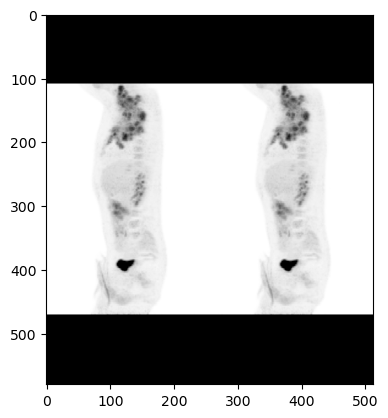

In [14]:
plt.imshow(image, cmap="gray")
plt.show()